In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [2]:
latent_size = 64
hidden_size = 256
image_size = 28 * 28
batch_size = 64

In [3]:
class Generator(nn.Module):
  def __init__(self):
    super(Generator, self).__init__()
    # 3개의 fc 사용 , ReLU , ReLU, Tanh
    self.fc = nn.Sequential(
        nn.Linear(latent_size, hidden_size),
        nn.ReLU(),

        nn.Linear(hidden_size, hidden_size),
        nn.ReLU(),

        nn.Linear(hidden_size, image_size),
        nn.Tanh(),
    )
  def forward(self, x):
    return self.fc(x)


In [10]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()

    self.fc = nn.Sequential(
        nn.Linear(image_size, hidden_size),
        nn.ReLU(),

        nn.Linear(hidden_size, hidden_size),
        nn.ReLU(),

        nn.Linear(hidden_size, 1),
        nn.Sigmoid(),

    )
  def forward(self, x):
    return self.fc(x)

In [12]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5],std=[0.5])])
mnist = MNIST(root='data/',
              train=True,
              transform=transform,
              download=True)
data_loader = DataLoader(dataset=mnist,
                         batch_size=batch_size,
                         shuffle=True,
                         num_workers=2,
                         drop_last = True)

In [13]:
num_epochs = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

G = Generator().to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()
d_optimizer = optim.Adam(D.parameters(), lr = 0.0002, betas = (0.5, 0.999))
g_optimizer = optim.Adam(G.parameters(), lr = 0.0002, betas = (0.5, 0.999))

In [14]:
def show_image(images, num_images=25, size=(1,28,28)):
  print(images.shape)
  image_flat = images.detach().cpu().view(-1,*size)
  image_grid = make_grid(image_flat[:num_images],nrow=5)
  plt.imshow(image_grid.permute(1,2,0).squeeze())
  plt.show()

In [18]:
for epoch in range(num_epochs):

  for i, (images, _) in enumerate(data_loader):

    images = images.reshape(batch_size, -1).to(device)

    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)

    output = D(images)
    d_loss_real = criterion(output, real_labels)

    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)

    output = D(fake_images.detach())
    d_loss_fake = criterion(output,fake_labels)

    d_loss = d_loss_real + d_loss_fake

    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()

    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    output = D(fake_images)
    g_loss = criterion(output,real_labels)

    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()

  show_image(fake_images)
  show_image(images)



Output hidden; open in https://colab.research.google.com to view.

torch.Size([64, 784])


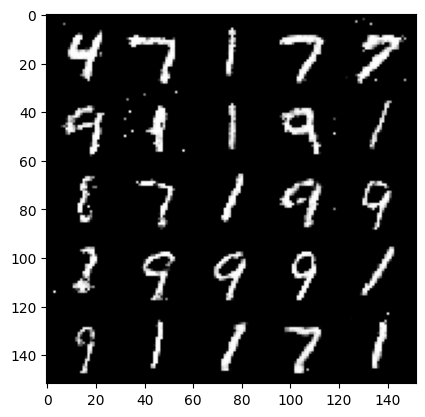

In [20]:
z = torch.randn(batch_size, latent_size).to(device)
fake_image = G(z)
show_image(fake_image)